In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import chain

In [2]:
wgi = pd.read_excel('wgidataset.xlsx')

In [3]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codeindyr     32100 non-null  object
 1   code          32100 non-null  object
 2   countryname   32100 non-null  object
 3   year          32100 non-null  int64 
 4   indicator     32100 non-null  object
 5   estimate      32100 non-null  object
 6   stddev        32100 non-null  object
 7   nsource       32100 non-null  object
 8   pctrank       32100 non-null  object
 9   pctranklower  32100 non-null  object
 10  pctrankupper  32100 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


In [4]:
wgi = wgi.iloc[:, chain(range(2, 5), [8])]

In [5]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countryname  32100 non-null  object
 1   year         32100 non-null  int64 
 2   indicator    32100 non-null  object
 3   pctrank      32100 non-null  object
dtypes: int64(1), object(3)
memory usage: 1003.3+ KB


In [6]:
wgi.head()

,countryname,year,indicator,pctrank
0,Afghanistan,1996,cc,4.301075
1,Albania,1996,cc,19.354839
2,Algeria,1996,cc,33.333332
3,American Samoa,1996,cc,..
4,Andorra,1996,cc,87.096771


In [7]:
wgi = wgi.loc[wgi['indicator'] == 'va'].reset_index(drop=True)

In [8]:
wgi.head()

,countryname,year,indicator,pctrank
0,Afghanistan,1996,va,1
1,Albania,1996,va,29.5
2,Algeria,1996,va,14.5
3,American Samoa,1996,va,..
4,Andorra,1996,va,98.5


In [9]:
wgi = wgi.replace({
    '..': np.nan
})

C:\Users\lazar\AppData\Local\Temp\ipykernel_2136\135315054.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wgi = wgi.replace({


In [10]:
wgi.head()

,countryname,year,indicator,pctrank
0,Afghanistan,1996,va,1.0
1,Albania,1996,va,29.5
2,Algeria,1996,va,14.5
3,American Samoa,1996,va,NaN
4,Andorra,1996,va,98.5


In [11]:
wgi.dtypes

countryname     object
year             int64
indicator       object
pctrank        float64
dtype: object

In [12]:
wgi_mundo = wgi.melt(
    id_vars='year',
    value_vars='pctrank',
    var_name='pct',
    value_name='valor'
)

In [13]:
wgi_mundo.head()

,year,pct,valor
0,1996,pctrank,1.0
1,1996,pctrank,29.5
2,1996,pctrank,14.5
3,1996,pctrank,NaN
4,1996,pctrank,98.5


In [14]:
wgi_mundo.head()

,year,pct,valor
0,1996,pctrank,1.0
1,1996,pctrank,29.5
2,1996,pctrank,14.5
3,1996,pctrank,NaN
4,1996,pctrank,98.5


In [15]:
wgi_mundo['valor'].describe()

count    5180.000000
mean       50.015958
std        29.027005
min         0.000000
25%        24.882629
50%        50.000000
75%        75.119122
max       100.000000
Name: valor, dtype: float64

In [16]:
wgi_mundo = wgi_mundo.groupby('year')['valor'].mean().reset_index()

In [17]:
wgi_mundo['regiao'] = 'Mundo'

In [18]:
wgi_mundo

,year,valor,regiao
0,1996,50.007463,Mundo
1,1998,50.007389,Mundo
2,2000,50.007389,Mundo
3,2002,50.007389,Mundo
4,2003,50.004926,Mundo
5,2004,50.009201,Mundo
6,2005,50.025304,Mundo
7,2006,50.027604,Mundo
8,2007,50.029904,Mundo
9,2008,50.029904,Mundo


In [19]:
wgi_brasil = wgi.loc[wgi['countryname'] == 'Brazil'].melt(
    id_vars='year',
    value_vars='pctrank',
    var_name='pct',
    value_name='valor'
)

In [20]:
wgi_brasil['regiao'] = 'Brasil'

In [21]:
wgi_brasil

,year,pct,valor,regiao
0,1996,pctrank,57.500000,Brasil
1,1998,pctrank,58.706467,Brasil
2,2000,pctrank,58.208954,Brasil
3,2002,pctrank,62.686565,Brasil
4,2003,pctrank,62.189056,Brasil
5,2004,pctrank,60.576923,Brasil
6,2005,pctrank,63.942307,Brasil
7,2006,pctrank,61.057693,Brasil
8,2007,pctrank,63.942307,Brasil
9,2008,pctrank,63.942307,Brasil


In [22]:
df = pd.concat([wgi_brasil, wgi_mundo], ignore_index=True).iloc[:, [0, 2 ,3]]

In [23]:
df

,year,valor,regiao
0,1996,57.500000,Brasil
1,1998,58.706467,Brasil
2,2000,58.208954,Brasil
3,2002,62.686565,Brasil
4,2003,62.189056,Brasil
5,2004,60.576923,Brasil
6,2005,63.942307,Brasil
7,2006,61.057693,Brasil
8,2007,63.942307,Brasil
9,2008,63.942307,Brasil


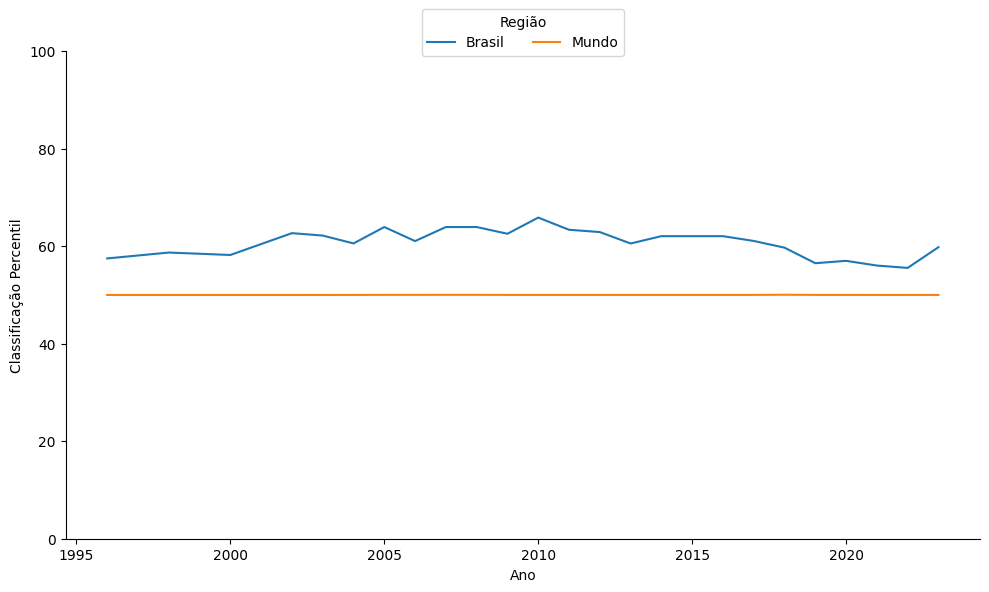

In [24]:
plt.figure(figsize=(10, 6))

sns.lineplot(df, x='year', y='valor', hue='regiao')

sns.despine()
plt.legend(title='Região', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=2)
plt.ylim(0, 100)
plt.ylabel('Classificação Percentil')
plt.xlabel('Ano')
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/comparacao_wgi_va_brasil_mundo.png', dpi=300, bbox_inches='tight')
plt.show()